In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
x, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 45)

lr = LinearRegression().fit(x_train, y_train)

In [3]:
print('coef_ : {}'.format(lr.coef_))
print('intercept_ : {}'.format(lr.intercept_))

coef_ : [0.39767137]
intercept_ : -0.0012542913869575817


In [4]:
x, y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 45)

lr = LinearRegression().fit(x_train, y_train)

In [5]:
print('coef_ : {}'.format(lr.coef_))
print('intercept_ : {}'.format(lr.intercept_))

coef_ : [-3.36491008e+01 -7.25448809e+01 -1.15353461e+02  5.67987876e+00
  2.00782428e+01  7.52261627e+01  3.84157779e+01  1.06705349e+01
  3.36994801e+01  6.60847060e+01 -3.54167884e+01  1.81551857e+01
  1.39969271e+01  2.29671236e+01  3.16437517e+02  7.73327326e+02
  2.28874890e+02 -7.18954972e+00  1.51522330e+01 -4.76075265e+01
 -4.25688813e+01  7.20657984e+02 -1.38930248e+03  1.09024511e+02
 -1.27489466e+01  3.06505100e+01 -5.98410954e+00 -1.29207925e+01
  4.40031727e-01 -1.76456225e+01  9.48298093e-01 -1.33396544e+00
 -2.90223628e+00 -1.87008486e+01  3.24698906e+01 -7.70639865e+00
  8.68076714e+01 -2.42271736e+01  2.29327612e+01  3.87744073e+00
  3.67018065e+01  3.08852664e+01  4.96563333e+00  5.12974844e+01
 -1.47228524e+01  9.59974873e+00 -5.88309888e+00  6.44685772e+01
 -8.20656870e+00  5.67987876e+00 -1.45589513e+01 -2.20115828e+01
  1.81280101e+00 -4.22780116e+00 -4.79966129e+00 -2.22141805e+00
 -1.81522370e+00  7.06686251e+00 -9.45891574e+00 -1.73649516e+01
 -1.19578621e+01 

In [6]:
print('훈련 세트 점수 : {:.2f}'.format(lr.score(x_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lr.score(x_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.86


In [7]:
# Ridge 회귀(L2 규제 = 벌점화)
ridge = Ridge().fit(x_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge.score(x_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge.score(x_test, y_test)))

훈련 세트 점수 : 0.85
테스트 세트 점수 : 0.85


In [8]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge10.score(x_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge10.score(x_test, y_test)))

훈련 세트 점수 : 0.75
테스트 세트 점수 : 0.77


In [9]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(ridge01.score(x_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(ridge01.score(x_test, y_test)))

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.88


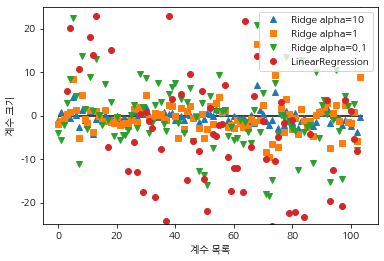

In [10]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

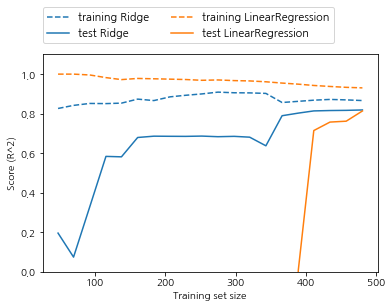

In [11]:
# 보스턴 주택가격 데이터 셋에 대한 릿지 회귀와 선형 회귀의 학습 곡선
mglearn.plots.plot_ridge_n_samples()

In [12]:
# Lasso 회귀(L1 규제 = 벌점화)
lasso = Lasso().fit(x_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso.score(x_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(x_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수 : 0.20
테스트 세트 점수 : 0.19
사용한 특성의 수 : 4


In [13]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso001.score(x_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso001.score(x_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.86
사용한 특성의 수 : 33


In [14]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)

print('훈련 세트 점수 : {:.2f}'.format(lasso00001.score(x_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso00001.score(x_test, y_test)))
print('사용한 특성의 수 : {}'.format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.86
사용한 특성의 수 : 94


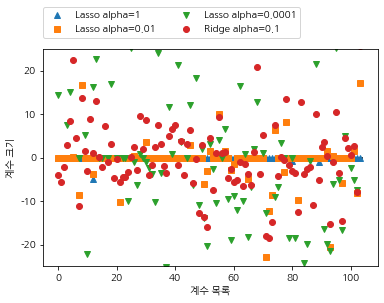

In [15]:
plt.plot(lasso.coef_, '^', label='Lasso alpha=1')
plt.plot(lasso001.coef_, 's', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

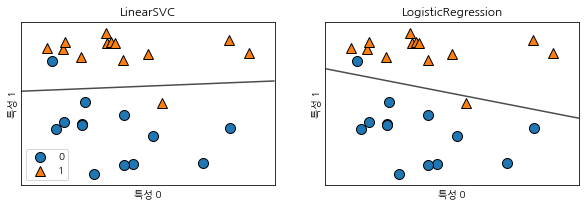

In [17]:
x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

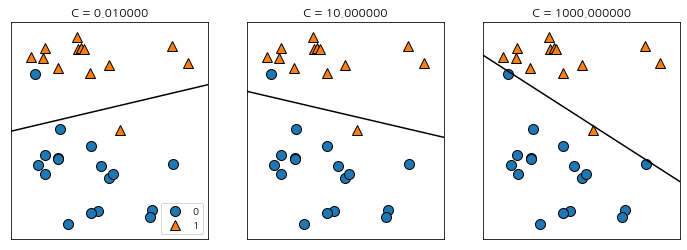

In [18]:
mglearn.plots.plot_linear_svc_regularization()

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(x_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg.score(x_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg.score(x_test, y_test)))

훈련 세트 점수 : 0.948
테스트 세트 점수 : 0.958


In [20]:
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg100.score(x_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg100.score(x_test, y_test)))

훈련 세트 점수 : 0.946
테스트 세트 점수 : 0.958


In [21]:
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg001.score(x_train, y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg001.score(x_test, y_test)))

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


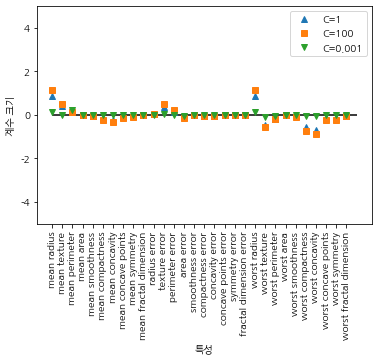

In [22]:
plt.plot(logreg.coef_.T, '^', label='C=1')
plt.plot(logreg100.coef_.T, 's', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.ylim(-5, 5)
plt.legend()

C=0.001인 로지스틱 회귀의 훈련 정확도 : 0.95
C=0.001인 로지스틱 회귀의 테스트 정확도 : 0.94
C=1.000인 로지스틱 회귀의 훈련 정확도 : 0.95
C=1.000인 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000인 로지스틱 회귀의 훈련 정확도 : 0.95
C=100.000인 로지스틱 회귀의 테스트 정확도 : 0.96


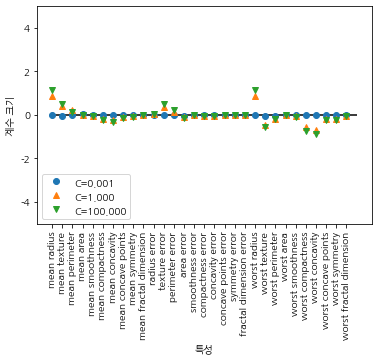

In [23]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C).fit(x_train, y_train)
    print('C={:.3f}인 로지스틱 회귀의 훈련 정확도 : {:.2f}'.format(C, lr_l1.score(x_train, y_train)))
    print('C={:.3f}인 로지스틱 회귀의 테스트 정확도 : {:.2f}'.format(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.ylim(-5, 5)
plt.legend(loc=3)

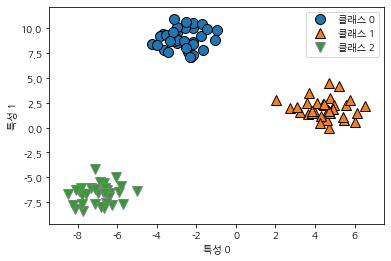

In [24]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2'])

In [25]:
linear_svm = LinearSVC().fit(x, y)
print('계수 배열의 크기 : ', linear_svm.coef_.shape)
print('절편 배열의 크기 : ', linear_svm.intercept_.shape)

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


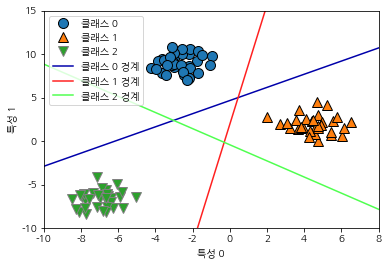

In [26]:
mglearn.discrete_scatter(x[:,0], x[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'])